### Problem Statement:

#### Refer Mall Customer Segmentation Dataset. Apply appropriate EDA methods wherever required and perform feature engineering. Construct a model using K means clustering classifier and form appropriate clusters. Analyse the performance of model.

### Importing libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

### Load dataset

In [2]:
df = pd.read_csv('mall segmentation.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Data Description

In [4]:
print(df.shape)
print('\n')
print(df.describe())
print('\n')
print(df.info())

(200, 5)


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age 

### Checking null values

In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No null values in dataset

In [6]:
df.duplicated().sum()

0

No duplicate values in dataset

Converting `Gender` column `Female` to `1` and `Male` to `0`m

In [8]:
df['Gender'] = df['Gender'].map({'Female':1, 'Male':0})
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


<AxesSubplot:>

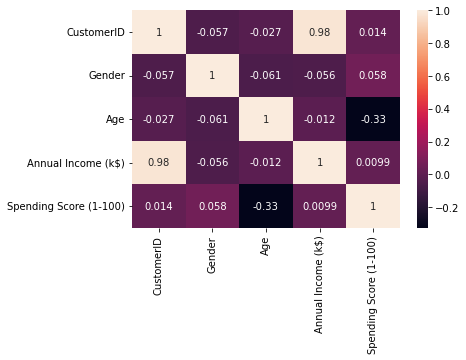

In [9]:
sns.heatmap(df.corr(),annot = True)

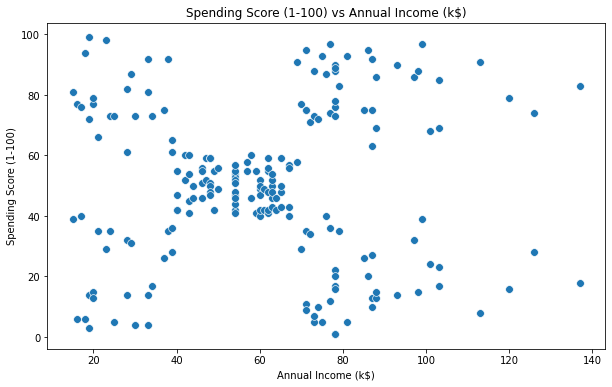

In [10]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [11]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)

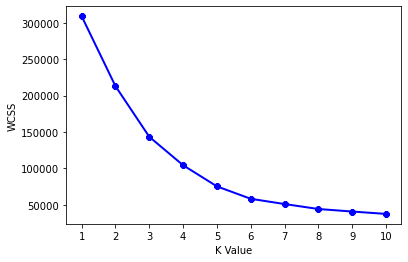

In [12]:
plt.plot(range(1, 11), wcss, linewidth = 2, color = "blue", marker = "8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS")
plt.show()

Above plot we got our optimal k-value which is `5`

In [14]:
km = KMeans(n_clusters = 5)
clusters = km.fit_predict(df.iloc[:,1:])
df['label'] = clusters

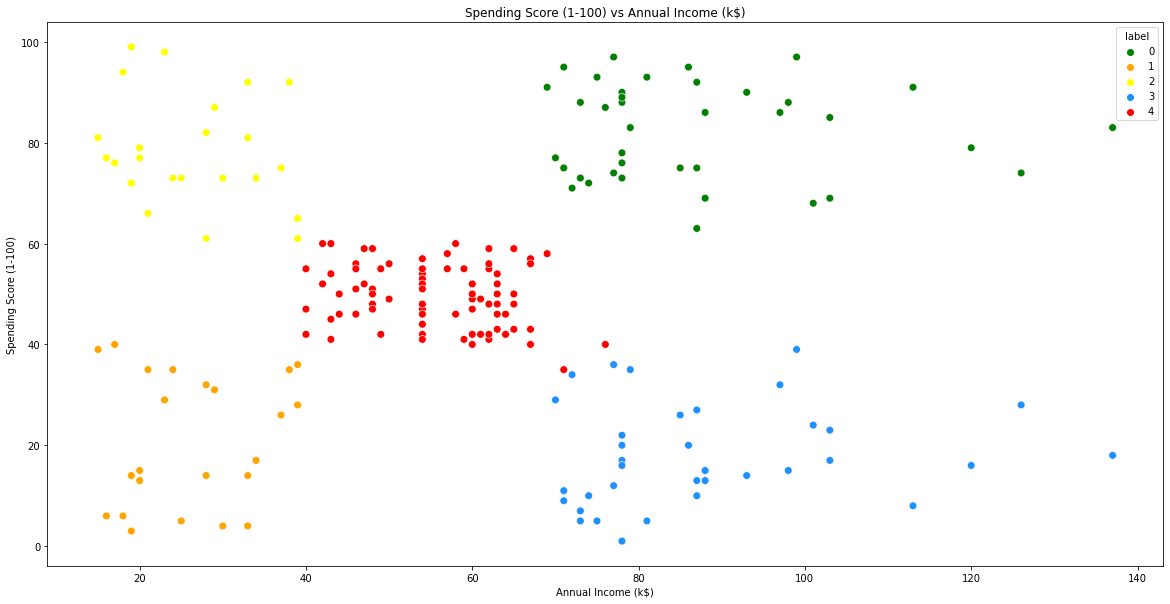

In [15]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'Annual Income (k$)',
                y = 'Spending Score (1-100)',
                hue = "label", 
                palette = ['green','orange','yellow','dodgerblue','red'], 
                legend = 'full', 
                data = df ,
                s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

We can see that 5 different clusters have been formed from the data.

The 'red' cluster is the customers with the least income and least spending score, similarly, the 'yellow' cluster is the customers with the most income and most spending score.